In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['HF_HOME'] = "../cache/"
import torch
from PIL import Image
from IPython.display import display
from sd35_reconstructor import SD35_Reconstructor

In [2]:
device = "cuda"
reconstructor = SD35_Reconstructor(device)

Stable Diffusion 3.5 Reconstructor: Loading model...


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Loading OpenAI CLIP L...
Loading OpenCLIP bigG...
Loading Google T5-v1-XXL...
Skipping key 'shared.weight' in safetensors file as 'shared' does not exist in python model
Loading VAE model...
Loading SD3 model...
Models loaded.


torch.Size([1, 154, 4096]) torch.Size([1, 2048])


100%|██████████| 38/38 [00:20<00:00,  1.82it/s]


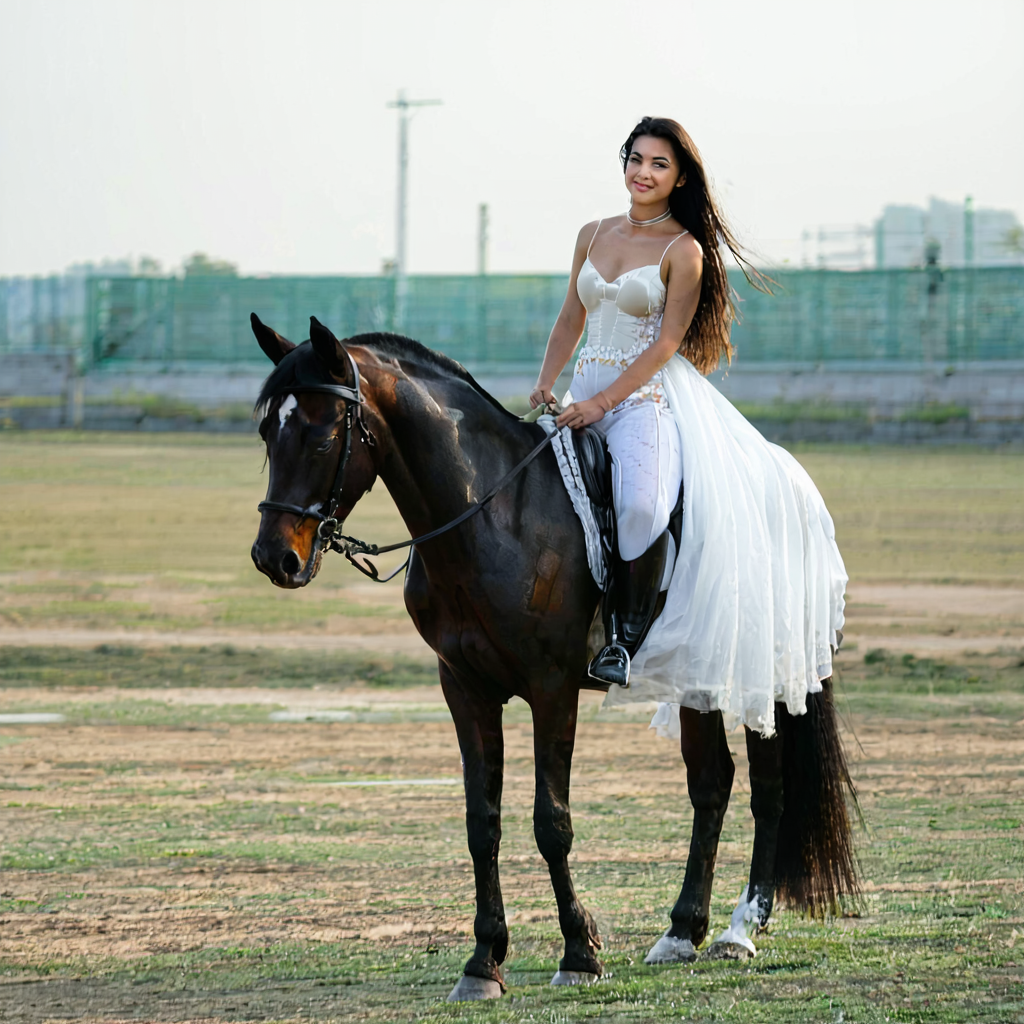

In [7]:

# index = 11
# t5_pred = t5_preds[index]
# clip_text_pred = clip_text_preds[index]
prompt = "a woman riding a horse"
# image = Image.open(f"{sc_recon_path}/{index}/5.png")
prompt_embed = reconstructor.embed_text(prompt)
print(prompt_embed[0].shape, prompt_embed[1].shape)
# image_embed = recon.embed_image(image)
image = Image.open("/home/naxos2-raid25/kneel027/home/kneel027/IP-Adapter_MEI/assets/images/horse.jpg")
# latent_embed = recon.embed_latent(image)
# print(torch.mean(image_embed), torch.mean(prompt_embed), torch.sum(image_embed), torch.sum(prompt_embed))
# print(prompt_embed.shape, image_embed.shape, latent_embed.shape)
# url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"
# init_image = load_image(url).resize((1024, 1024))

images = reconstructor.reconstruct(image=image, c_t=prompt_embed, strength=0.95, num_steps=40, n_samples=1, cfg=4.5)
# show_images(sample)
display(images)